# BUSINESS UNDERSTANDING




 **Stakeholder and analytics Objectives**
1.   Pelanggan (Customers), Home Credit berusaha memenuhi kebutuhan dan keinginan pelanggan dengan memberikan pinjaman yang mudah, cepat, dan terjangkau, serta memberikan pelayanan pelanggan yang baik.
2.   Pemegang Saham (Shareholders), individu atau entitas yang memiliki saham dalam perusahaan dan memiliki kepentingan dalam keberhasilan dan pertumbuhan perusahaan
*   Objectives
	Mengoptimalkan Manajemen Risiko: Home Credit perlu mengelola portofolio pinjaman dengan efektif dan memitigasi risiko kredit. Objektif ini dapat melibatkan penerapan model penilaian risiko yang kuat, menganalisis data pelanggan untuk skor kredit yang lebih baik, dan terus memantau kinerja pinjaman untuk meminimalkan gagal bayar dan kerugian.

 **Problem statement**
 Home credit harus bisa menentukan manajemen resiko yang tepat untuk mengatasi gagal bayar dari kliennya, karena hal ini dapat menyebabkan kerugian. Di sini, kami menggunakan berbagai model Machine learning untuk mencoba memperkirakan kemampuan pembayaran klien mereka.
Prakiraan ini akan mengarah pada solusi yang memungkinkan bank untuk meminjamkan kepada masyarakat umum dengan aman.

 **Problem Discovery**
1.   Bagaimana meningkatkan presisi dalam memprediksi risiko gagal bayar berdasarkan data pelanggan?
2.   Data dari kategori apa saja yang mempunyai presentase gagal bayar terbesar?

 **Findings and key takeaways **

- Berdasarkan data yang telah kami olah menunjukkan bahwa gender laki2 mempunyai risiko gagal bayar 10% sedangkan untuk perempuan 7% yang artinya laki-laki mempunyai risiko gagal bayar lebih tinggi dari perempuan.
-Berdasarkan status pernikahan klien dengan status pernikahan sipil mempunyai presentase tertinggi 10% - Berdasarkan jumlah anak keluarga dengan jumlah anak lebih dari 10 mempunyai presentase tertinggi yaitu 100%
- Jumlah pendapatan, klien dengan status cuti melahirkan mempunyai resiko tertinggi sebesar 40%
- Jenis pekerjaan , klien tenaga kerja keterampilan mempunyai presentase tertinggi >17%
- Tipe organisasi transportasi mempunyai presentase tertinggi 16%
- Tingkat pendidikan, klien lulusan di bawah S1 mempunyai tingkat presentase tertinggi 11%
- Tipe rumah, klien Apartemen sewaan dan Bersama orang tua memiliki tingkat tidak dapat dilunasi lebih dari 10%.

 **Insight and Recommendation**

1.   Insight: perusahaan home credit harus memerhatikan biodata pelanggan sebelum menyetujui transaksi peminjaman uang. Seperti gender, status pernikahan, jumlah anak, jumlah pendapatan, jenis pekerjaan, bidang organisasi, tingkat pendidikan dan status rumah. Hal tersebut dilakukan sebagai pencegahan terhadap adanya resiko gagal bayar dari calon klien.

2.	Recomendation: Mengoptimalkan Manajemen Risiko Home Credit perlu mengelola portofolio pinjaman dengan efektif dan memitigasi risiko kredit dengan melalukan analisis data menggunakan model Random Forest tanpa tuning maka dapat menjelaskan masalah yang dialami lebih baik daripada menggunakan metode lain.











# Load Data

Langkah awal dalam analisis data sebelum Exploratory Data Analysis (EDA) adalah import library yang dibutuhkan terlebih dahulu

In [ ]:
# Import library untuk mengolah data
import pandas as pd
import numpy as np
# Import library untuk visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Pandas show all column
# Menampilkan maksimal kolom sebanyak 200 kolom pada output dataframe
pd.set_option('display.max_columns', 200)

# Menghilangkan pesan peringatan (warning) yang muncul ketika program dijalankan
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
## Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [ ]:
def import_csv(link):
    id = link.split('/')[-2]
    downloaded = drive.CreateFile({'id': id})
    downloaded.GetContentFile('application_train.csv')
    app_train = pd.read_csv('application_train.csv')
    return app_train

In [ ]:
url_app_train = 'https://drive.google.com/file/d/1njvokGLjGjrSy8xMQjr3r3I0DQfnlxlx/view?usp=drive_link'
url_app_test = 'https://drive.google.com/file/d/1Bcrys7ImwMY6O8lwK1uen6Lj_-SPHt9e/view?usp=share_link'

In [ ]:
# Mengunggah file dataset ke dalam Google Colab
app_train = import_csv(url_app_train)
# app_test = import_csv(url_app_test)

# DATA UNDERSTANDING

In [ ]:
# Menampilkan dataset secara default, yaitu 5 urutan teratas
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [ ]:
# Menampilkan jumlah data menurut baris dan kolom dari dataset
app_train.shape

(307511, 122)

Dari sini, diketahui bahwa terdapat 307511 baris dan 122 kolom dari dataset yang diunggah

In [ ]:
# Menampilkan kolom-kolom pada dataset
app_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

Hal yang telah dilakukan di atas termasuk pada tahap data understanding. Data understanding sangat penting dilakukan agar kita dapat mengetahui data yang akan dikerjakan merupakan data yang seperti apa. Informasi-informasi terkait data yang terdapat pada link sumber dataset juga penting untuk diperhatikan. Seperti contohnya pada bagian 'context','content,dst. Dataset yang dipakai merupakan data **Home Credit Risk Scoring untuk tujuan bisnis yang ingin dicapai dengan menggunakan model Credit Scoring, untuk meningkatkan akurasi dalam menilai risiko kredit pelanggan.**


Pada tahap selanjutnya, dilakukan analisis EDA. Di sini, app_train.info() dapat digunakan untuk mengetahui jumlah data, kolom yang tidak non-null, dan tipe data.

In [ ]:
app_train.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

## Check Data Unbalance

In [ ]:
app_train["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

Nilai **TARGET** 0 berarti pinjaman dilunasi, nilai 1 berarti pinjaman tidak dilunasi.

In [ ]:
print("Percentage: ")
(app_train["TARGET"].value_counts()/app_train["TARGET"].count())*100

Percentage: 


0    91.927118
1     8.072882
Name: TARGET, dtype: float64

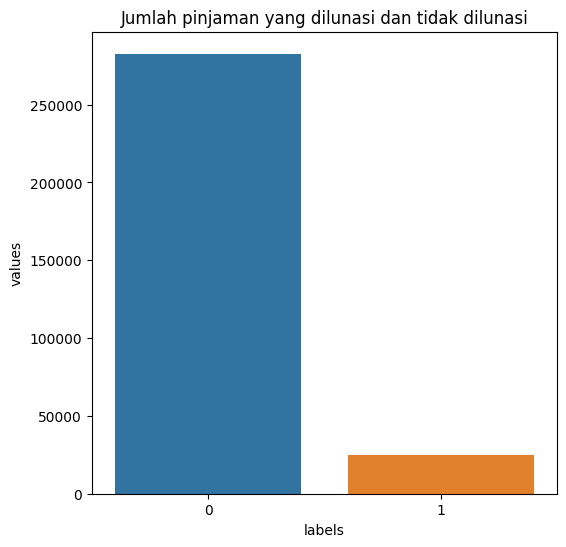

In [ ]:
# temp = app_train["TARGET"].value_counts()
# app_train = pd.DataFrame({'labels': temp.index,
                         # 'values': temp.values})
# plt.figure(figsize = (6,6))
# plt.title('Jumlah pinjaman yang dilunasi dan tidak dilunasi')
# sns.set_color_codes("pastel")
# sns.barplot(x = 'labels', y="values", data=app_train)
# plt.show()

## Missing Values Handling

In [ ]:
def missing_values_table(app_train):
        # Total missing values
        mis_val = app_train.isnull().sum()

        # Persentase of missing values
        mis_val_percent = 100 * app_train.isnull().sum() / len(app_train)

        # Buat tabel dengan hasilnya
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        # Ganti nama kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Urutkan tabel berdasarkan persentase penurunan yang hilang
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)

        # Print beberapa informasi ringkasan
        print ("Your selected dataframe has " + str(app_train.shape[1]) + " columns.\n"
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")


        # Kembalikan dataframe dengan informasi yang hilang
        return mis_val_table_ren_columns

In [ ]:
miss_cols = missing_values_table(app_train)
miss_cols

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [ ]:
cats_cols = app_train.select_dtypes(include='object'). \
                    columns[app_train.select_dtypes(include='object').isna().any()].tolist()
nums_cols = app_train.select_dtypes(exclude='object') \
                    .columns[app_train.select_dtypes(exclude='object').isna().any()].tolist()

In [ ]:
# Mendapatkan daftar kolom numerik dan kategorikal yang memiliki nilai yang hilang
numeric_cols = miss_cols.index[miss_cols.index.isin(app_train.select_dtypes(include=np.number).columns)].tolist()
categorical_cols = miss_cols.index[miss_cols.index.isin(app_train.select_dtypes(include='object').columns)].tolist()

# Mengisi nilai yang hilang pada kolom numerik dengan metode 'mean' atau 'median'
for col in numeric_cols:
    if miss_cols.loc[col, '% of Total Values'] == 100:
        # Jika seluruh nilai pada kolom hilang, kita tidak dapat mengisi dengan mean atau median
        print("Kolom", col, "tidak dapat diimputasi karena seluruh nilainya hilang")
    else:
        if miss_cols.loc[col, '% of Total Values'] > 50:
            # Jika persentase nilai hilang lebih dari 50%, kita gunakan median
            value = app_train[col].median()
            print("Kolom", col, "diisi dengan median:", value)
        else:
            # Jika persentase nilai hilang kurang dari atau sama dengan 50%, kita gunakan mean
            value = app_train[col].mean()
            print("Kolom", col, "diisi dengan mean:", value)
        app_train[col].fillna(value, inplace=True)

# Mengisi nilai yang hilang pada kolom kategorikal dengan metode 'mode'
for col in categorical_cols:
    mode_value = app_train[col].mode().iloc[0]
    print("Kolom", col, "diisi dengan mode:", mode_value)
    app_train[col].fillna(mode_value, inplace=True)


Kolom COMMONAREA_MEDI diisi dengan median: 0.0208
Kolom COMMONAREA_AVG diisi dengan median: 0.0211
Kolom COMMONAREA_MODE diisi dengan median: 0.019
Kolom NONLIVINGAPARTMENTS_MEDI diisi dengan median: 0.0
Kolom NONLIVINGAPARTMENTS_MODE diisi dengan median: 0.0
Kolom NONLIVINGAPARTMENTS_AVG diisi dengan median: 0.0
Kolom LIVINGAPARTMENTS_MODE diisi dengan median: 0.0771
Kolom LIVINGAPARTMENTS_MEDI diisi dengan median: 0.0761
Kolom LIVINGAPARTMENTS_AVG diisi dengan median: 0.0756
Kolom FLOORSMIN_MODE diisi dengan median: 0.2083
Kolom FLOORSMIN_MEDI diisi dengan median: 0.2083
Kolom FLOORSMIN_AVG diisi dengan median: 0.2083
Kolom YEARS_BUILD_MODE diisi dengan median: 0.7648
Kolom YEARS_BUILD_MEDI diisi dengan median: 0.7585
Kolom YEARS_BUILD_AVG diisi dengan median: 0.7552
Kolom OWN_CAR_AGE diisi dengan median: 9.0
Kolom LANDAREA_AVG diisi dengan median: 0.0481
Kolom LANDAREA_MEDI diisi dengan median: 0.0487
Kolom LANDAREA_MODE diisi dengan median: 0.0458
Kolom BASEMENTAREA_MEDI diisi deng

In [ ]:
app_train.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

## DOWNLOAD DATA CLEANED

In [ ]:
from google.colab import files


selected_columns = ['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'NAME_INCOME_TYPE', 'OCCUPATION_TYPE', 'ORGANIZATION_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_HOUSING_TYPE']
df_selected = app_train[selected_columns]

# Simpan DataFrame ke dalam file CSV
df_selected.to_csv('selected_columns.csv', index=False)

# Download file CSV
files.download('selected_columns.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# app_train = app_train.dropna()
# app_train.isna().sum()

## Statistical summary

Sebelum masuk ke tahap analisis statistical summary, variabel akan dipisahkan menjadi dua, yaitu categorical dan numeric menggunakan **list comprehension**. Cara ini merupakan cara cepat ketika memiliki data dalam jumlah banyak untuk memisahkan data categorical dan numeric

In [ ]:
cats=[i for i in app_train.columns if app_train[i].dtypes == 'object']
nums=[i for i in app_train.columns if app_train[i].dtypes != 'object']

Penyimpanan kolom diatas memudahkan untuk proses kedepannya dimana kita fokus pada kolom - kolom yang akan dilakukan analisis

In [ ]:
cats # Melihat data categorical

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE']

In [ ]:
nums # Melihat data numeric

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAR

In [ ]:
# Mengecek unique value dari setiap kolom menggunakan value_counts
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(app_train[col].value_counts())
    print()

Value count kolom NAME_CONTRACT_TYPE:
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

Value count kolom CODE_GENDER:
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

Value count kolom FLAG_OWN_CAR:
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

Value count kolom FLAG_OWN_REALTY:
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

Value count kolom NAME_TYPE_SUITE:
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

Value count kolom NAME_INCOME_TYPE:
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

Va

### Pendekatan numerik

In [ ]:
# Menggunakan app_train.describe() untuk melihat statistik dari data
# '.T' memiliki arti transpose
app_train[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.0,189145.5,278202.000000,367142.500000,456255.0
TARGET,307511.0,0.080729,0.272419,0.0,0.0,0.000000,0.000000,1.0
CNT_CHILDREN,307511.0,0.417052,0.722121,0.0,0.0,0.000000,1.000000,19.0
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.000000,202500.000000,117000000.0
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.000000,808650.000000,4050000.0
...,...,...,...,...,...,...,...,...
AMT_REQ_CREDIT_BUREAU_DAY,307511.0,0.007000,0.103009,0.0,0.0,0.000000,0.000000,9.0
AMT_REQ_CREDIT_BUREAU_WEEK,307511.0,0.034362,0.190366,0.0,0.0,0.000000,0.000000,8.0
AMT_REQ_CREDIT_BUREAU_MON,307511.0,0.267395,0.851923,0.0,0.0,0.000000,0.267395,27.0
AMT_REQ_CREDIT_BUREAU_QRT,307511.0,0.265474,0.738507,0.0,0.0,0.000000,0.265474,261.0


### Pendekatan kategorik

In [ ]:
# Pada pendekatan kategorik menggunakan describe, kita bisa melihat nilai yang terbanyak dari 'top'
app_train[cats].describe().T

,count,unique,top,freq
NAME_CONTRACT_TYPE,307511,2,Cash loans,278232
CODE_GENDER,307511,3,F,202448
FLAG_OWN_CAR,307511,2,N,202924
FLAG_OWN_REALTY,307511,2,Y,213312
NAME_TYPE_SUITE,307511,7,Unaccompanied,249818
NAME_INCOME_TYPE,307511,8,Working,158774
NAME_EDUCATION_TYPE,307511,5,Secondary / secondary special,218391
NAME_FAMILY_STATUS,307511,6,Married,196432
NAME_HOUSING_TYPE,307511,6,House / apartment,272868
OCCUPATION_TYPE,307511,18,Laborers,151577


# Exploratory Data Analysis

## Loan types

Selanjutnya kita lihat jenis pinjaman yang diambil dan juga, di petak terpisah, persentase pinjaman (berdasarkan jenis pinjaman) dengan nilai TARGET 1 (pinjaman tidak dikembalikan).

In [ ]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    app_train1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=app_train1)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

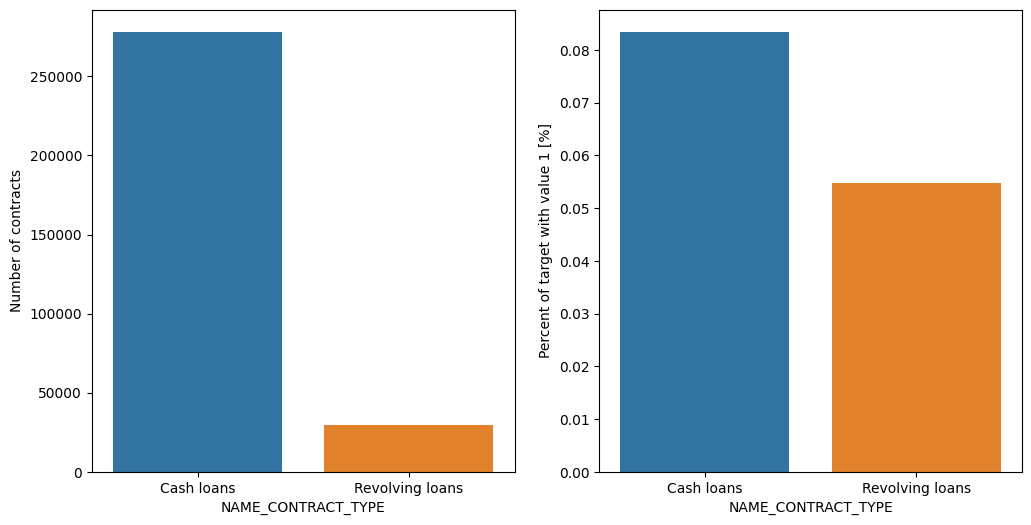

In [ ]:
plot_stats('NAME_CONTRACT_TYPE')

Contract type Revolving loans are just a small fraction from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

## Client gender

Selanjutnya kita lihat gender klien dan juga, pada plot terpisah, persentase pinjaman (berdasarkan gender klien) dengan nilai TARGET 1 (pinjaman tidak dikembalikan).

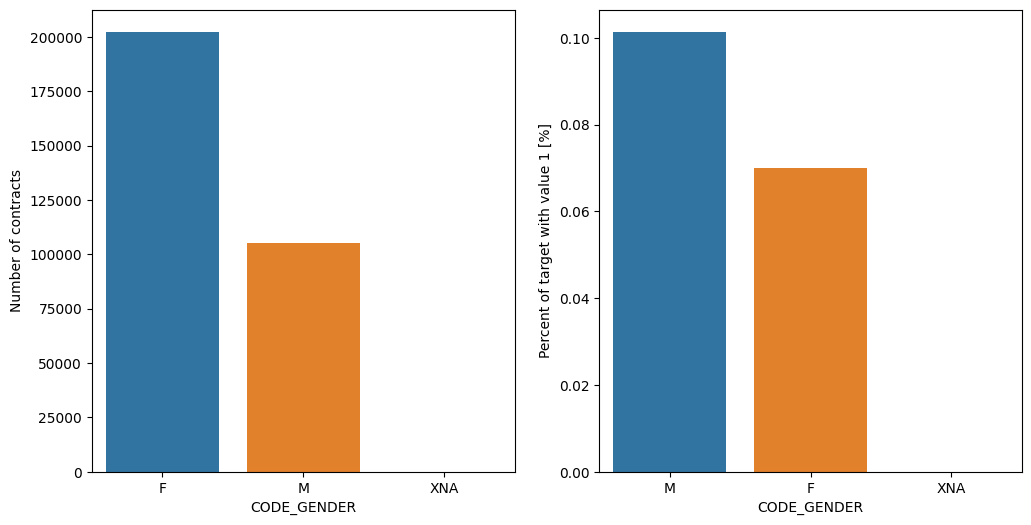

In [ ]:
plot_stats('CODE_GENDER') #TAMBAHKAN TABEL KONTINGENSI DAN VISUALISASI BARPLOT STACKED

Jumlah klien wanita hampir dua kali lipat jumlah klien pria. Dilihat dari persentase defaulted credits, laki-laki memiliki peluang lebih tinggi untuk tidak mengembalikan pinjaman mereka.

[teks link](https://)## Flag own car and flag own real estate

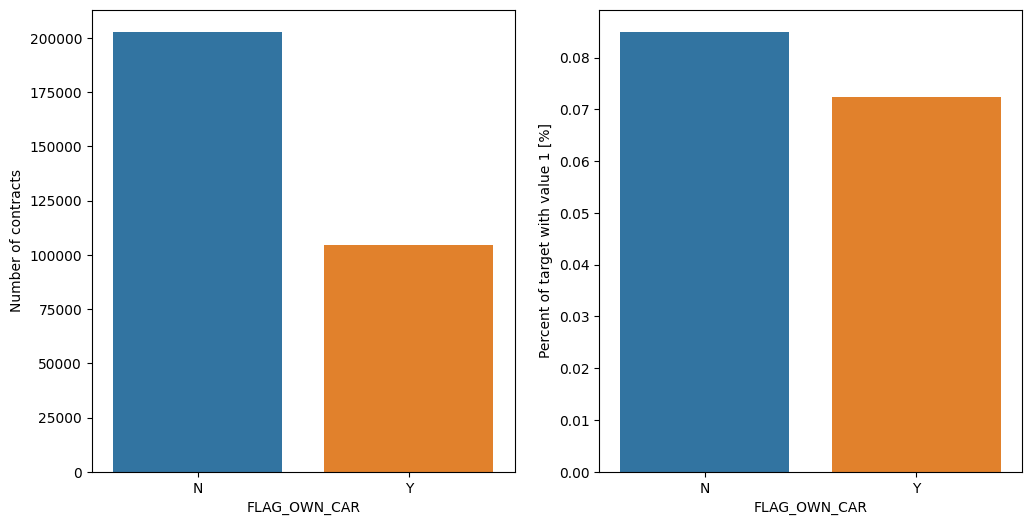

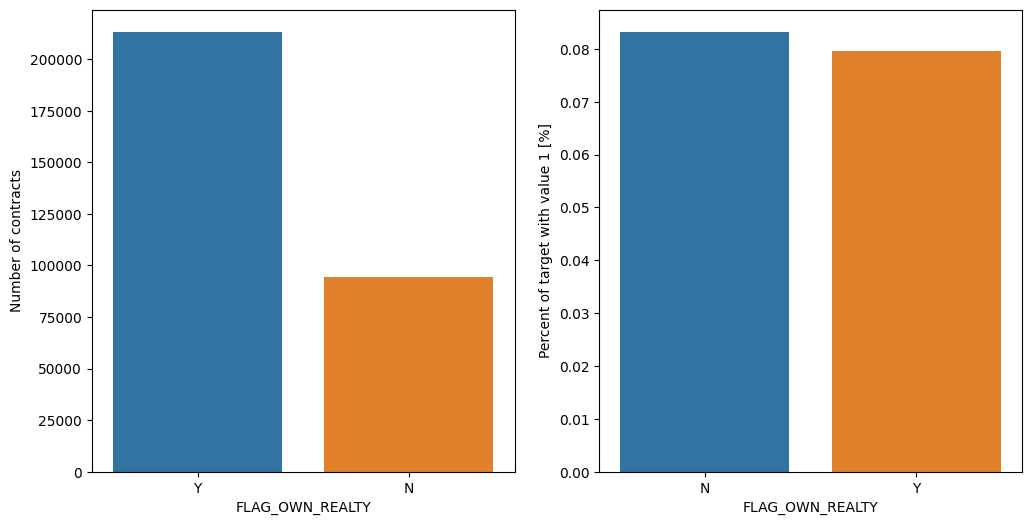

In [ ]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

Klien yang memiliki mobil hampir setengah dari klien yang tidak memilikinya. Kedua kategori tersebut memiliki tingkat tidak-pembayaran sekitar 8%.

Klien yang memiliki real estat lebih dari dua kali lipat klien yang tidak memiliki. Kedua kategori (memiliki real estat atau tidak memiliki) memiliki tingkat tidak membayar kembali sekitar 8%.

## Client accompanied by

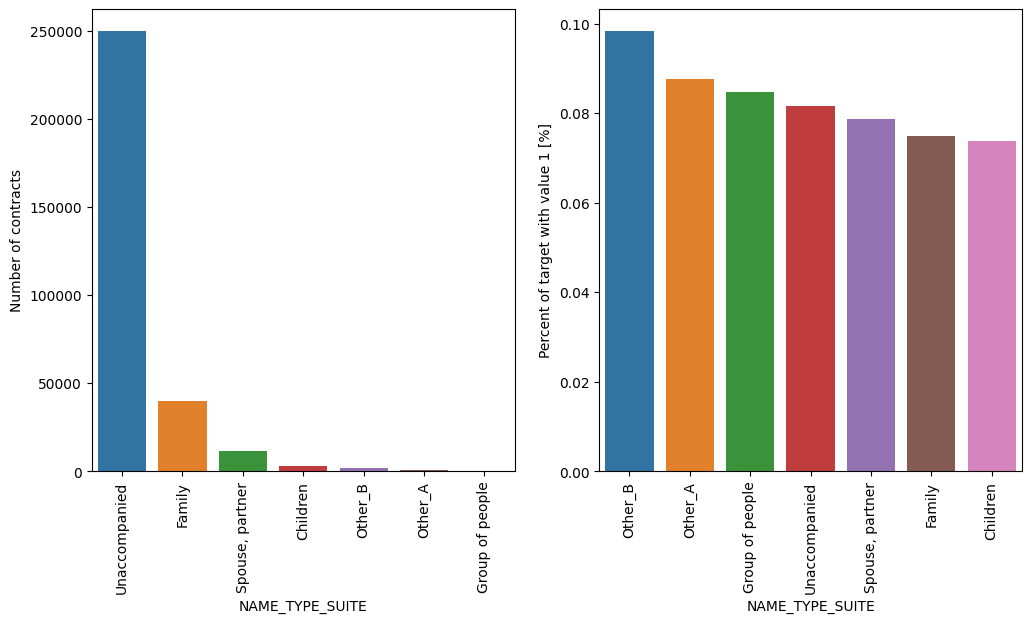

In [ ]:
plot_stats('NAME_TYPE_SUITE',True, True)

Sebagian besar klien tidak ditemani saat mengajukan pinjaman. Dalam hal persentase pinjaman yang tidak dilunasi, klien yang didampingi oleh Other_B dan Other_A lebih kecil kemungkinannya untuk membayar kembali.

## Family status of client

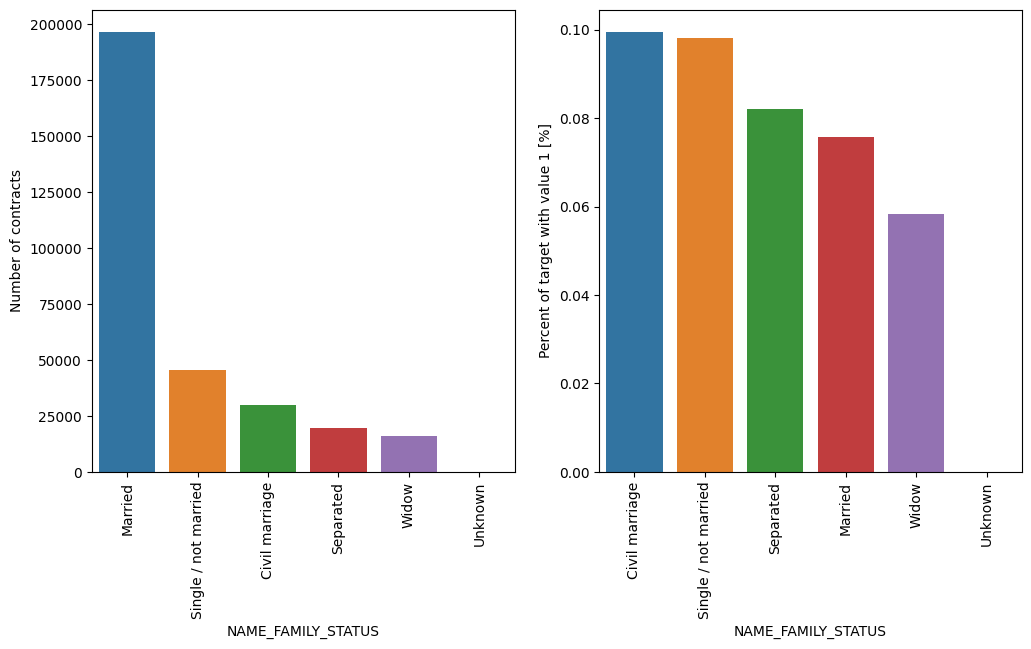

In [ ]:
plot_stats('NAME_FAMILY_STATUS',True, True)

Sebagian besar klien sudah menikah, diikuti Single/belum menikah dan pernikahan sipil.

Dalam hal persentase tidak dilunasi pinjaman, Perkawinan sipil memiliki persentase tidak dilunasi tertinggi (10%), dengan Janda yang terendah (pengecualian tidak diketahui).

## Number of children

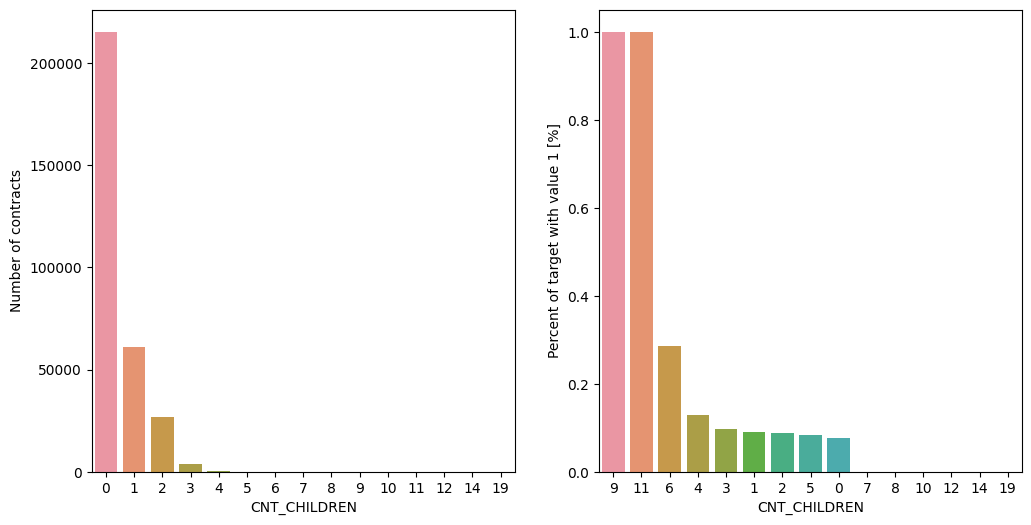

In [ ]:
plot_stats('CNT_CHILDREN')

Sebagian besar klien yang mengambil pinjaman tidak memiliki anak. Jumlah pinjaman yang terkait dengan klien dengan satu anak 4 kali lebih kecil, jumlah pinjaman yang terkait dengan klien dengan dua anak 8 kali lebih kecil; klien dengan 3, 4 anak atau lebih jauh lebih jarang.

Untuk pelunasan, klien tanpa anak, 1, 2, 3, dan 5 anak memiliki persentase tidak membayar rata-rata sekitar (10%). Klien dengan 4 dan 6 anak berada di atas rata-rata dalam hal persentase pinjaman yang tidak dibayar kembali (lebih dari 25% untuk keluarga dengan 6 anak).

Sedangkan untuk klien dengan 9 atau 11 anak, persentase pinjaman yang tidak dilunasi adalah 100%.

## Number of family members of client

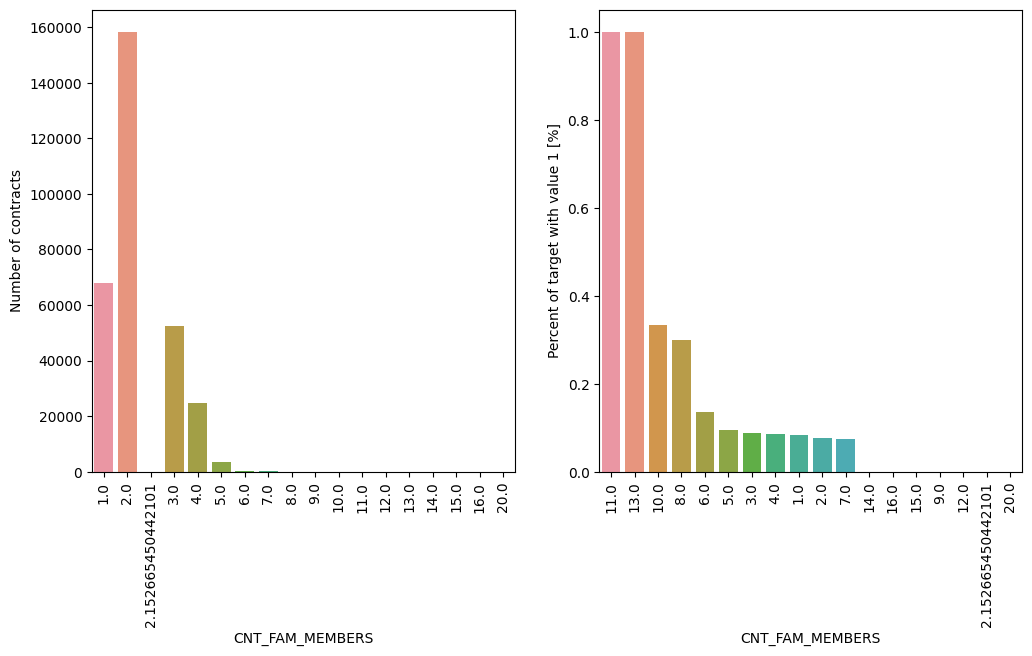

In [ ]:
plot_stats('CNT_FAM_MEMBERS',True)

Klien dengan anggota keluarga 2 paling banyak, diikuti oleh 1 (single), 3 (keluarga dengan satu anak) dan 4.

Klien dengan ukuran keluarga 11 dan 13 memiliki tingkat pembayaran tidak 100%. Keluarga lain dengan 10 atau 8 anggota memiliki persentase tidak membayar kembali pinjaman lebih dari 30%. Keluarga dengan 6 anggota atau kurang memiliki tingkat pengembalian yang mendekati rata-rata 10%.

## Income type of client

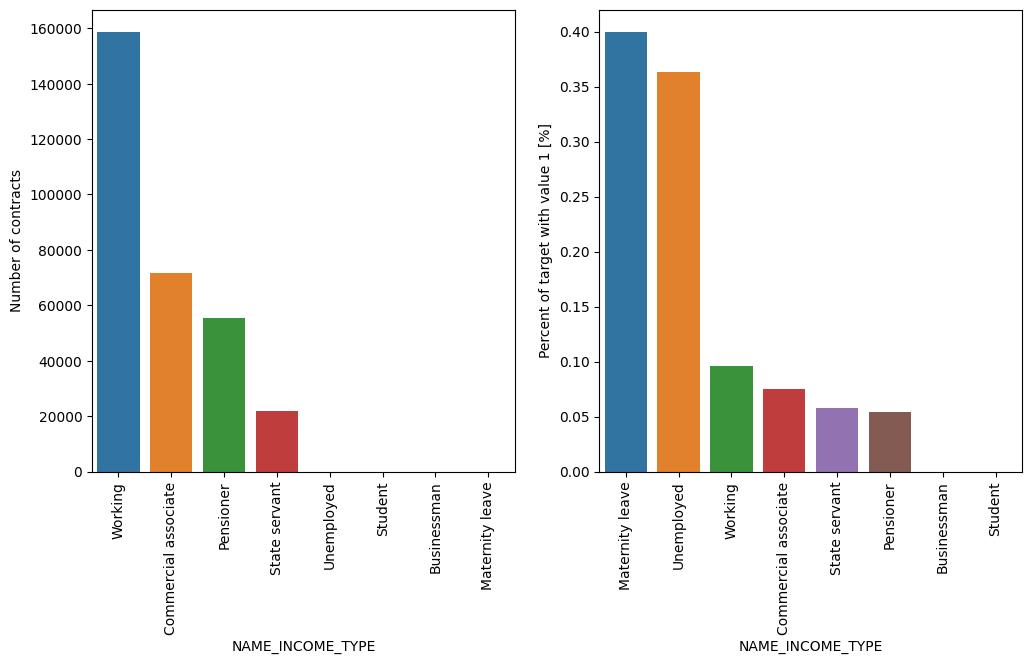

In [ ]:
plot_stats('NAME_INCOME_TYPE',True,True)

Sebagian besar pemohon pinjaman adalah yang berpenghasilan dari Bekerja, diikuti oleh Mitra Usaha, Pensiunan dan Pegawai Negeri Sipil.

Pemohon dengan jenis penghasilan Cuti melahirkan memiliki rasio tidak mengembalikan pinjaman hampir 40%, diikuti oleh Pengangguran (37%). Jenis pendapatan lainnya berada di bawah rata-rata 10% karena tidak mengembalikan pinjaman.

## Occupation of client

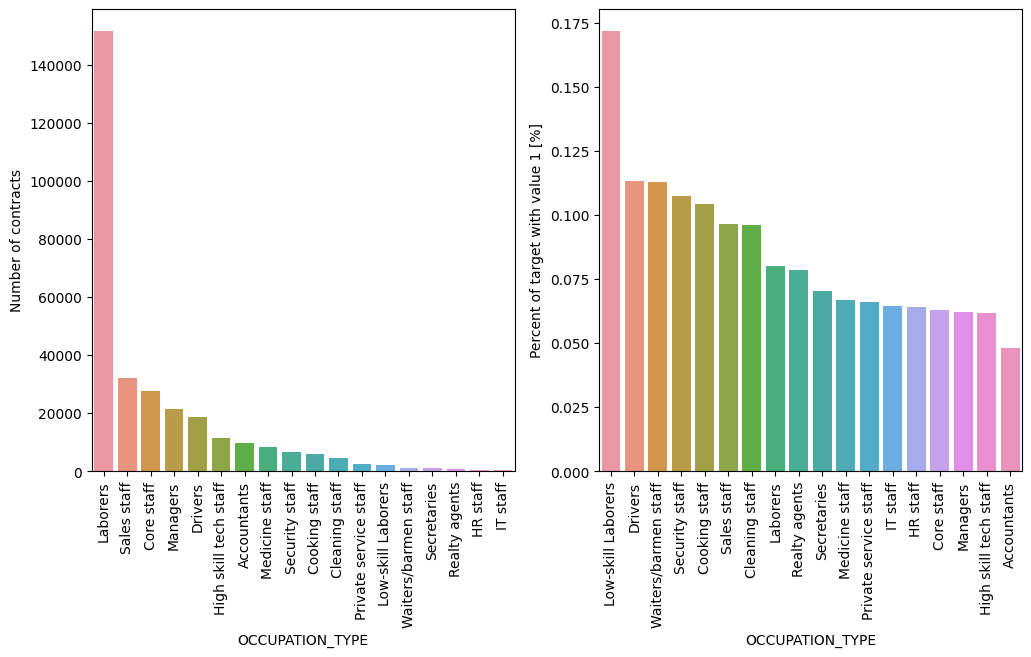

In [ ]:
plot_stats('OCCUPATION_TYPE',True, True)

Sebagian besar pinjaman diambil oleh Buruh, diikuti oleh staf Penjualan. Staf TI mengambil jumlah pinjaman terendah.

Kategori dengan persentase pinjaman yang tidak dilunasi tertinggi adalah Tenaga Kerja Keterampilan Rendah (di atas 17%), diikuti oleh staf Pengemudi dan Pelayan/barmen, staf Keamanan, Tenaga Kerja dan staf Memasak.

## Organization type

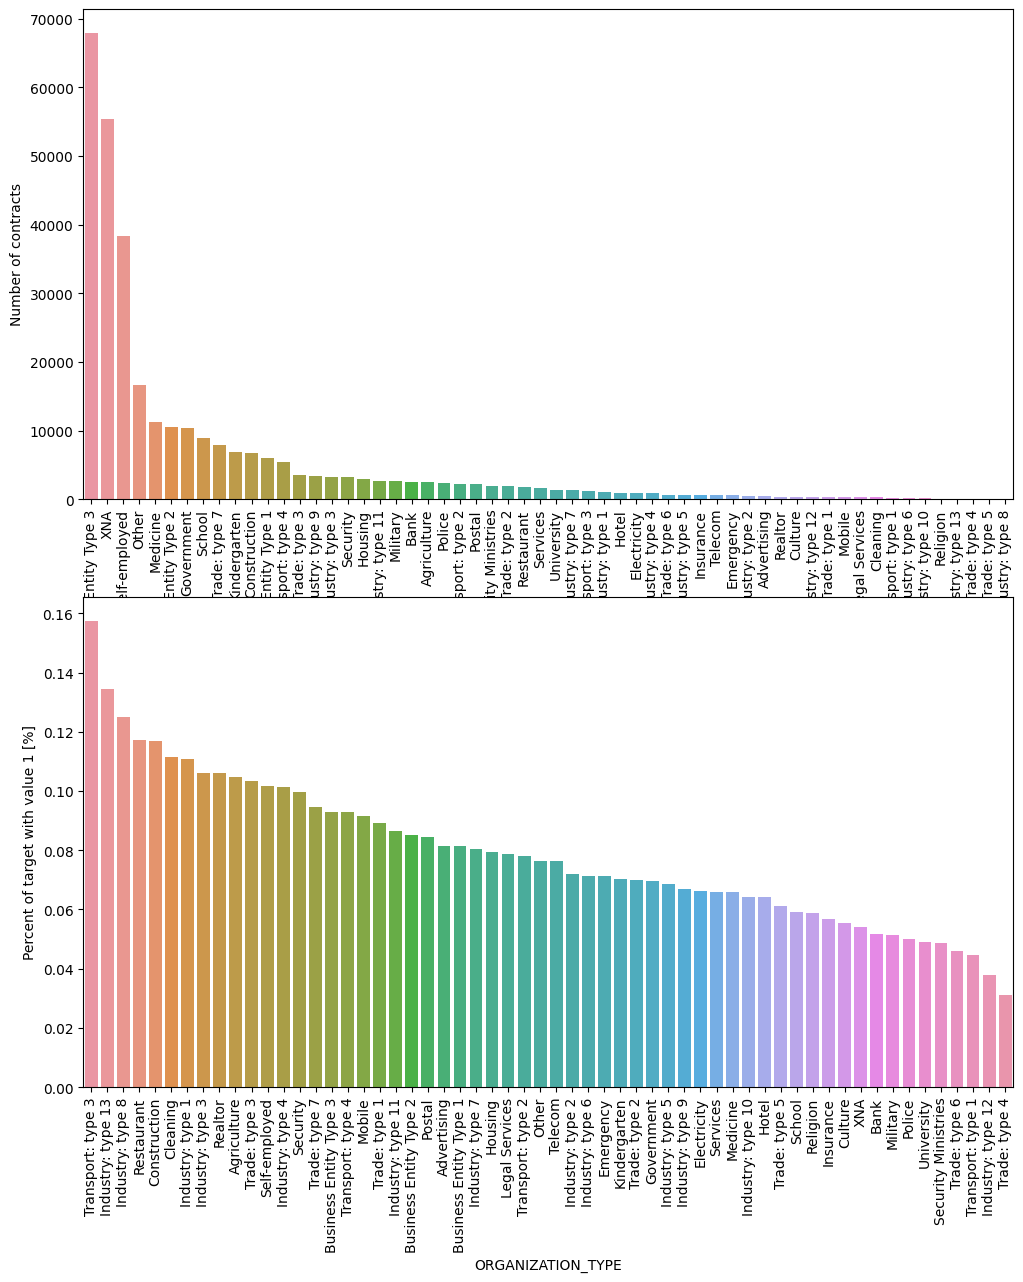

In [ ]:
plot_stats('ORGANIZATION_TYPE',True, False)

Organisasi dengan persentase pinjaman yang tidak dilunasi tertinggi adalah Transportasi: tipe 3 (16%), Industri: tipe 13 (13,5%), Industri: tipe 8 (12,5%) dan Restoran (kurang dari 12%).

## Education type of the client

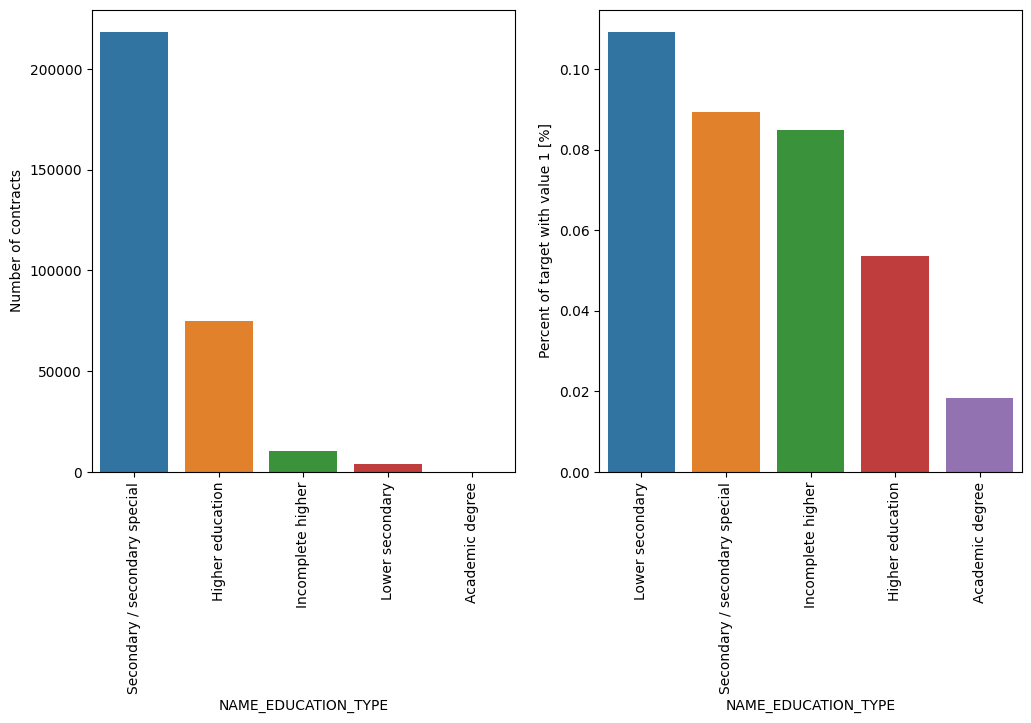

In [ ]:
plot_stats('NAME_EDUCATION_TYPE',True)

Mayoritas klien berpendidikan menengah/menengah khusus, diikuti oleh klien berpendidikan tinggi. Hanya sedikit sekali yang bergelar sarjana.

Kategori menengah bawah, meskipun jarang, memiliki tingkat tidak mengembalikan pinjaman terbesar (11%). Orang-orang dengan gelar Akademik memiliki tingkat tidak membayar kurang dari 2%.

## Type of the housing of client

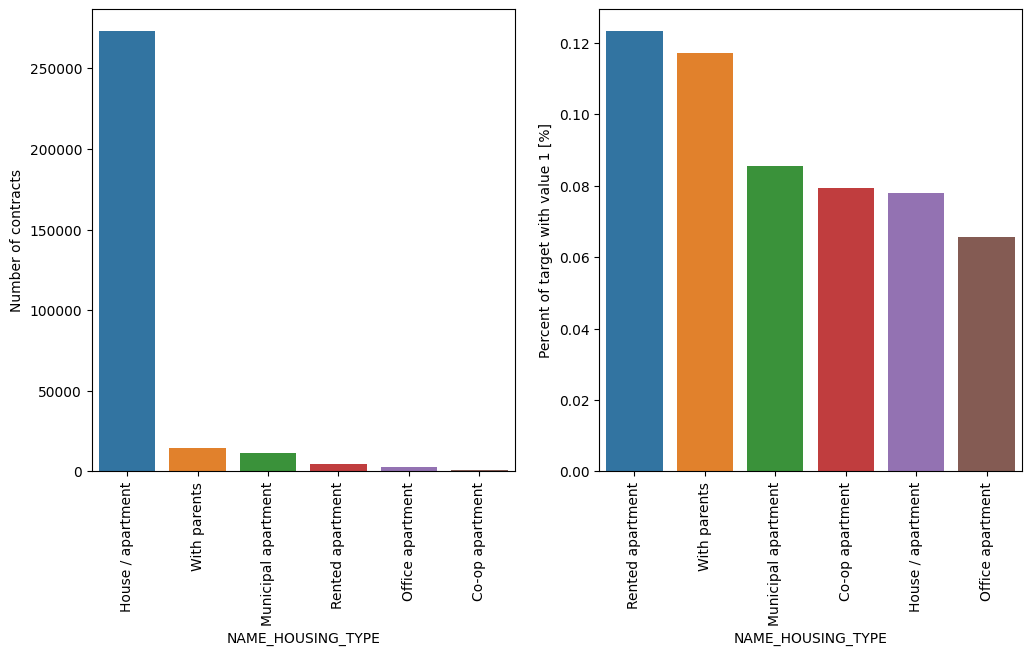

In [ ]:
plot_stats('NAME_HOUSING_TYPE',True)

Lebih dari 250.000 pemohon kredit mendaftarkan rumah mereka sebagai Rumah/apartemen. Kategori berikut memiliki jumlah klien yang sangat kecil (Dengan orang tua, Apartemen kota).

Dari kategori ini, Apartemen sewaan dan Bersama orang tua memiliki tingkat tidak dapat dilunasi lebih dari 10%.

## Total income distribution

In [ ]:
# # Plot distribusi satu feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.distplot(app_train[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [ ]:
# Plot distribusi beberapa fitur, dengan TARGET = 1/0 pada grafik yang sama
def plot_distribution_comp(var,nrow=2):

    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

In [ ]:
app_train['AMT_INCOME_TOTAL'].min(),app_train['AMT_INCOME_TOTAL'].max()

(25650.0, 117000000.0)

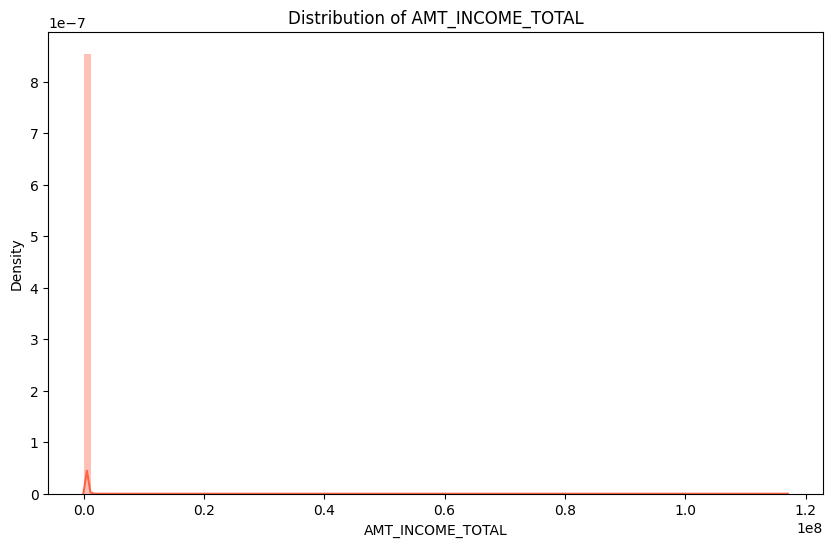

In [ ]:
plot_distribution('AMT_INCOME_TOTAL','tomato')

## Credit Distribution

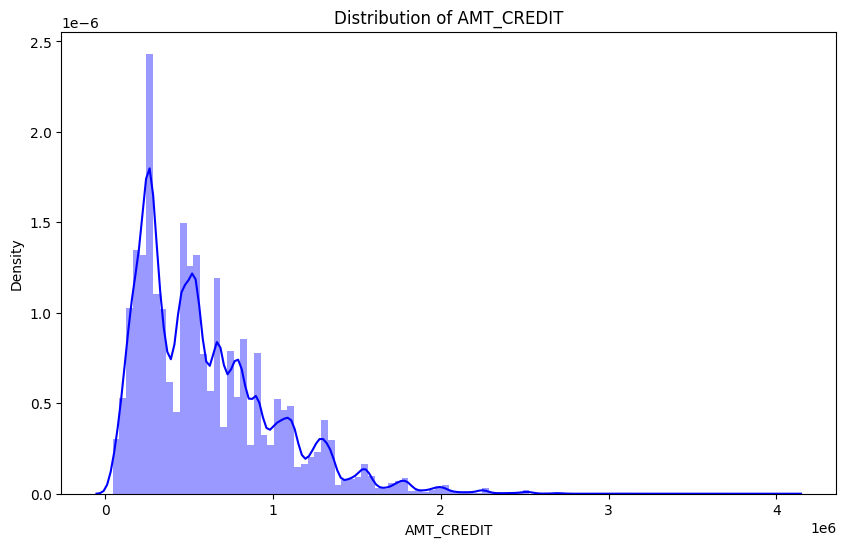

In [ ]:
plot_distribution('AMT_CREDIT','blue')

## Annuity distribution

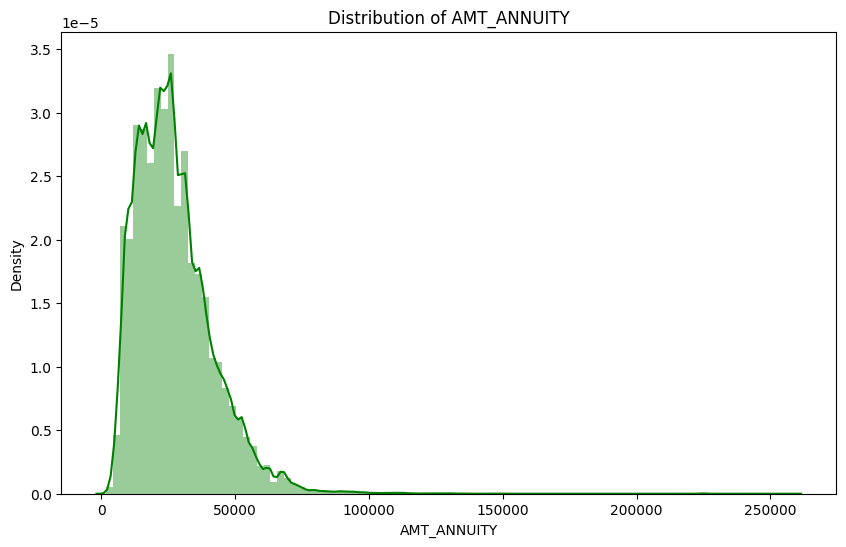

In [ ]:
plot_distribution('AMT_ANNUITY','green')

## Goods Price

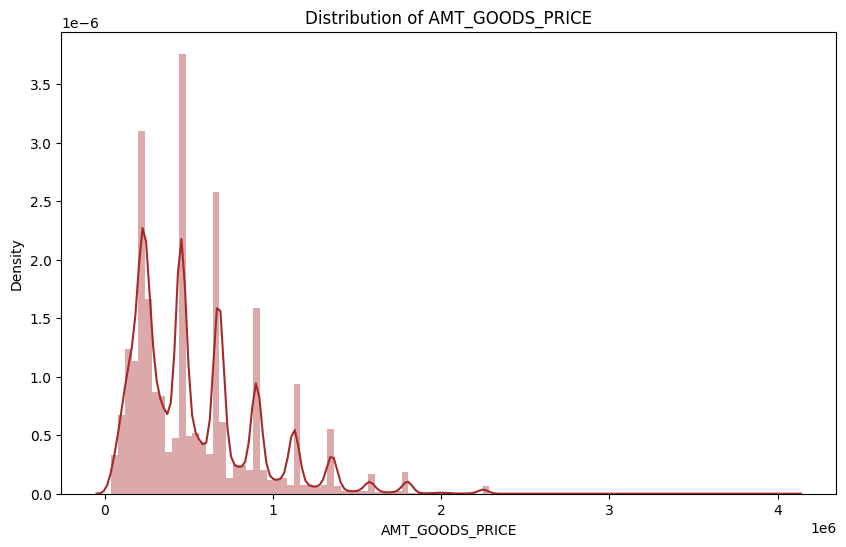

In [ ]:
plot_distribution('AMT_GOODS_PRICE','brown')

## Days from birth distribution

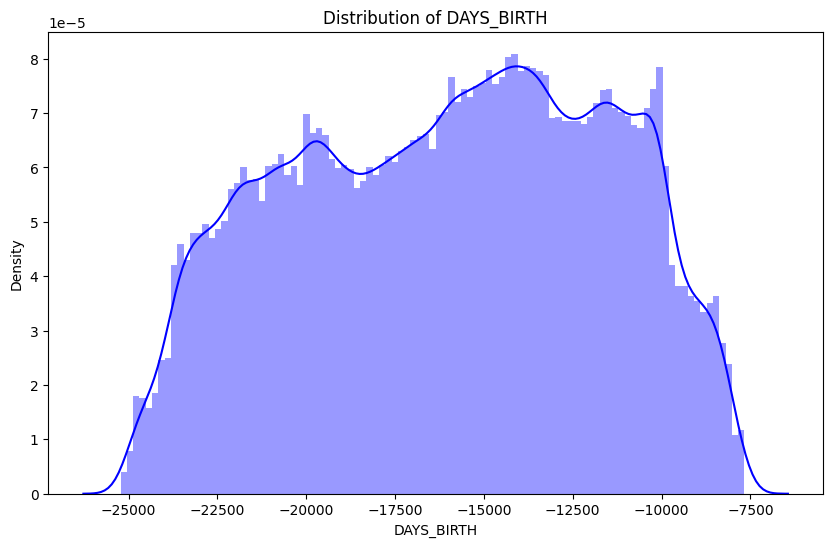

In [ ]:
plot_distribution('DAYS_BIRTH','blue')

Nilai negatif menandakan bahwa tanggal lahir berada di masa lalu. Rentang usia berkisar antara sekitar 20 hingga 68 tahun.

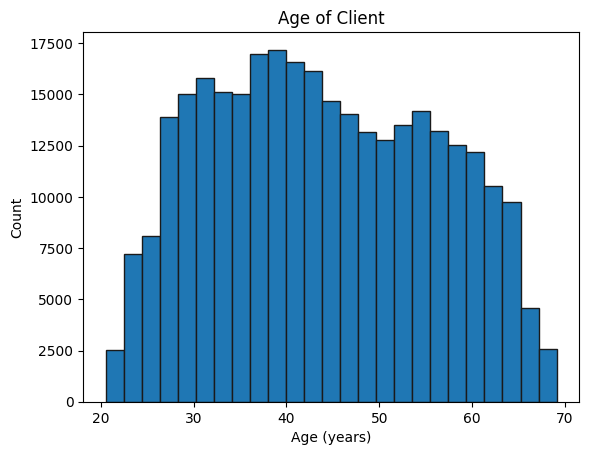

In [ ]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

# Plot the distribution of ages in years
plt.hist(app_train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Tidak ada nilai yang di luar batas wajar karena semua usia terlihat masuk akal. Mari kita visualisasikan pengaruh usia terhadap target dengan membuat plot estimasi kepadatan kernel (KDE) yang diwarnai berdasarkan nilai targetnya.

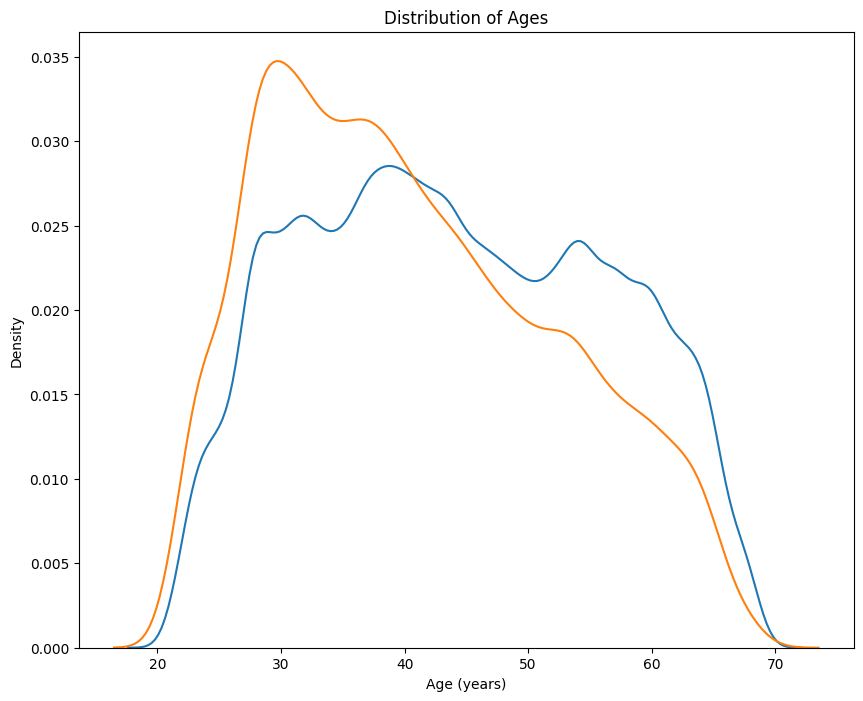

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

Grafik target == 1 condong ke arah rentang usia yang lebih muda. Meskipun ini bukan korelasi yang signifikan (koefisien korelasi -0,07), variabel ini kemungkinan akan berguna dalam model machine learning karena mempengaruhi target.

Dengan demikian, ada tren yang jelas: pelamar yang lebih muda lebih cenderung tidak mengembalikan pinjaman! Ini adalah informasi yang dapat langsung digunakan oleh bank: karena klien yang lebih muda kurang mungkin mengembalikan pinjaman, mungkin sebaiknya mereka diberikan panduan atau tips perencanaan keuangan lebih banyak. Ini tidak berarti bank harus mendiskriminasi klien yang lebih muda, tetapi bijaksana untuk mengambil langkah-langkah pencegahan untuk membantu klien yang lebih muda membayar tepat waktu.

## Days employed distribution

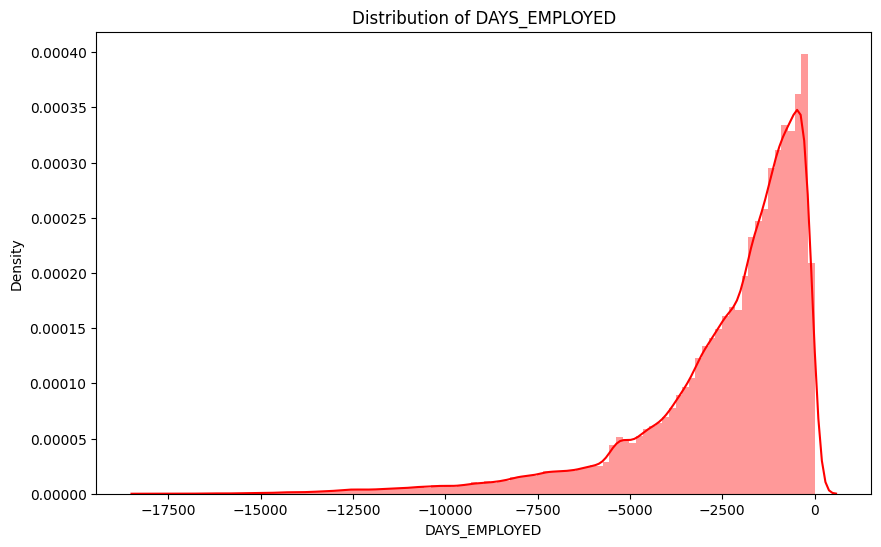

In [ ]:
# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

plot_distribution('DAYS_EMPLOYED','red')

## Days of registration distribution

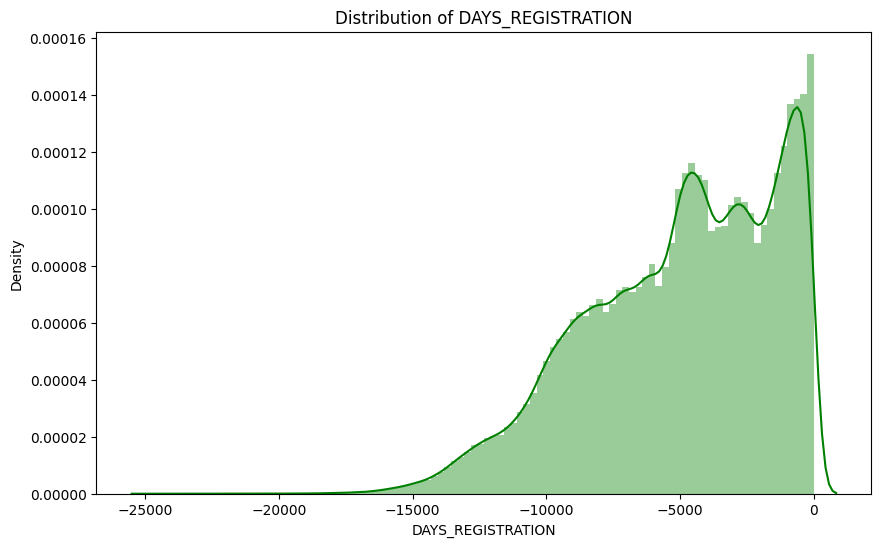

In [ ]:
plot_distribution('DAYS_REGISTRATION','green')

In [ ]:
# Menghitung korelasi antar kolom
corr_matrix = app_train.corr()

# Mengurutkan korelasi
sorted_corr = corr_matrix.abs().unstack().sort_values(ascending=False)

# Membuang pasangan kolom dengan korelasi diri sendiri (nilai korelasi 1)
sorted_corr = sorted_corr[sorted_corr != 1]

# Menampilkan korelasi yang diurutkan
print(sorted_corr)

YEARS_BUILD_MEDI            YEARS_BUILD_AVG               9.984952e-01
YEARS_BUILD_AVG             YEARS_BUILD_MEDI              9.984952e-01
OBS_30_CNT_SOCIAL_CIRCLE    OBS_60_CNT_SOCIAL_CIRCLE      9.984895e-01
OBS_60_CNT_SOCIAL_CIRCLE    OBS_30_CNT_SOCIAL_CIRCLE      9.984895e-01
FLOORSMIN_MEDI              FLOORSMIN_AVG                 9.972783e-01
                                                              ...     
AMT_REQ_CREDIT_BUREAU_WEEK  FLAG_DOCUMENT_2               4.996928e-19
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_DAY     2.225333e-19
AMT_REQ_CREDIT_BUREAU_DAY   FLAG_DOCUMENT_2               2.225333e-19
AMT_REQ_CREDIT_BUREAU_HOUR  FLAG_DOCUMENT_2               2.019220e-20
FLAG_DOCUMENT_2             AMT_REQ_CREDIT_BUREAU_HOUR    2.019220e-20
Length: 11130, dtype: float64


In [ ]:
# Menganalisis numerik dahulu menggunakan boxplot
# plt.figure(figsize=(6,4))     # Figure dengan panjang 6 dan lebar 4
# for i in range(0, len(nums)): # Loop dari 0 hingga banyak kolom dari nums
#    plt.subplot(1, 106, i+1)  # Menentukan lokasi boxplot
#    sns.boxplot(y = app_train[nums[i]], color='green', orient='v')
#    plt.tight_layout()        # Merapatkan visualisasi

## Features Correlation

In [ ]:
# Find correlations with the target and sort
correlations = app_train.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(20))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 OBS_30_CNT_SOCIAL_CIRCLE       0.009123
CNT_FAM_MEMBERS                0.009308
OWN_CAR_AGE                    0.015982
AMT_REQ_CREDIT_BUREAU_YEAR     0.018160
CNT_CHILDREN                   0.019187
FLAG_WORK_PHONE                0.028524
DEF_60_CNT_SOCIAL_CIRCLE       0.031251
DEF_30_CNT_SOCIAL_CIRCLE       0.032222
LIVE_CITY_NOT_WORK_CITY        0.032518
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                 -0.160303
EXT_SOURCE_3                 -0.157397
EXT_SOURCE_1                 -0.09

In [ ]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH','DAYS_EMPLOYED']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED
TARGET,1.000000,-0.098887,-0.160303,-0.157397,0.078239,-0.044932
EXT_SOURCE_1,-0.098887,1.000000,0.134956,0.111396,-0.362185,0.149234
EXT_SOURCE_2,-0.160303,0.134956,1.000000,0.096653,-0.091885,-0.020739
EXT_SOURCE_3,-0.157397,0.111396,0.096653,1.000000,-0.181252,0.101515
DAYS_BIRTH,0.078239,-0.362185,-0.091885,-0.181252,1.000000,-0.615864
DAYS_EMPLOYED,-0.044932,0.149234,-0.020739,0.101515,-0.615864,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

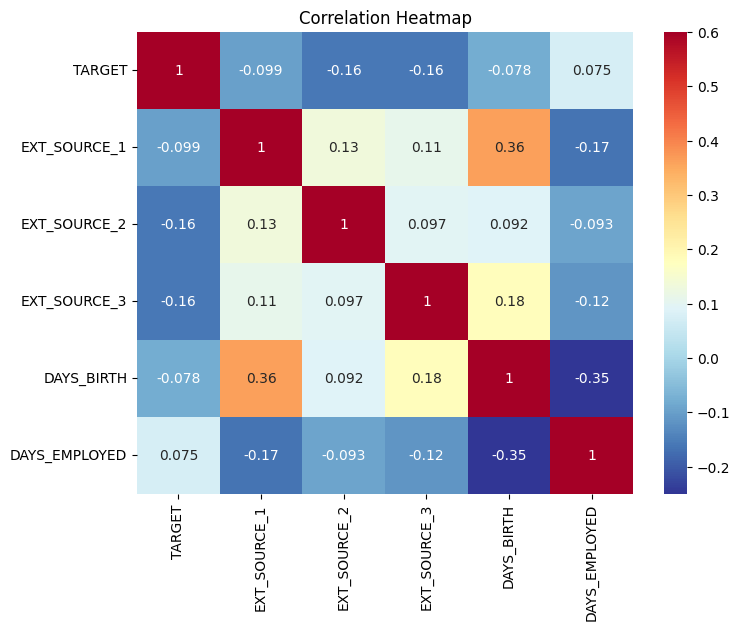

In [ ]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap')

Dalam heatmap korelasi, kita dapat mengidentifikasi korelasi kuat dengan melihat nilai koefisien korelasi antara dua fitur. Korelasi memiliki rentang nilai dari -1 hingga 1, di mana nilai 1 menunjukkan korelasi positif sempurna, nilai -1 menunjukkan korelasi negatif sempurna, dan nilai 0 menunjukkan tidak adanya korelasi.

Dalam heatmap korelasi, area yang memiliki warna lebih terang menunjukkan korelasi positif yang lebih kuat, sedangkan area dengan warna lebih gelap menunjukkan korelasi negatif yang lebih kuat. Jika terdapat area dengan warna yang mendekati 1 atau -1, itu menunjukkan adanya korelasi kuat antara dua fitur tersebut.

# DATA PROCESSING / CLEANING

## One hot encoding / encoding

In [ ]:
# Melihat jumlah unique values dalam kolom-kolom kategorikal
app_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [ ]:
# Import dataset app_test
app_test = import_csv(url_app_test)

In [ ]:
# Membuat objek LabelEncoder
#le = LabelEncoder()
#le_count = 0

# Iterasi melalui kolom-kolom dataset app_train
#for col in app_train:
#   if app_train[col].dtype == 'object':
       # Jika terdapat 2 atau kurang kategori unik
#       if len(list(app_train[col].unique())) <= 2:
           # Melakukan aawalan pada data training
#           le.fit(app_train[col])
            # Melakukan encoding pada data testing dan data training
#           app_train[col] = le.transform(app_train[col])
#           app_test[col] = le.transform(app_test[col])

           # Menghitung jumlah kolom yang di-label encode
#           le_count += 1

#print('%d columns were label encoded.' % le_count)

mengubah app_train dan app_test dimana data kategorikal dengan label <= 2 terencode menjadi 1 dan 0

In [ ]:
app_train.shape

(307511, 122)

In [ ]:
# One-hot encoding pada data training dan testing untuk kategorikal variabel
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 242)
Testing Features shape:  (48744, 239)


mengubah app_train dan app_test dengan one hot encoding

In [ ]:
# Mengambil kolom target dari dataset app_train
train_labels = app_train['TARGET']

# Menyamakan kolom antara data training dan testing
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

# Menambahkan kolom target kembali ke dataset app_train
app_train['TARGET'] = train_labels

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 238)
Testing Features shape:  (48744, 237)


mengubah app_train dan app_test untuk menyamakan jumlah column dengan join

## Anomalies

In [ ]:
# Menghitung statistik deskriptif untuk kolom 'DAYS_EMPLOYED'
(app_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

10       365243
17       365243
22       365243
26       365243
36       365243
          ...  
48717    365243
48728    365243
48731    365243
48735    365243
48736    365243
Name: DAYS_EMPLOYED, Length: 9274, dtype: int64

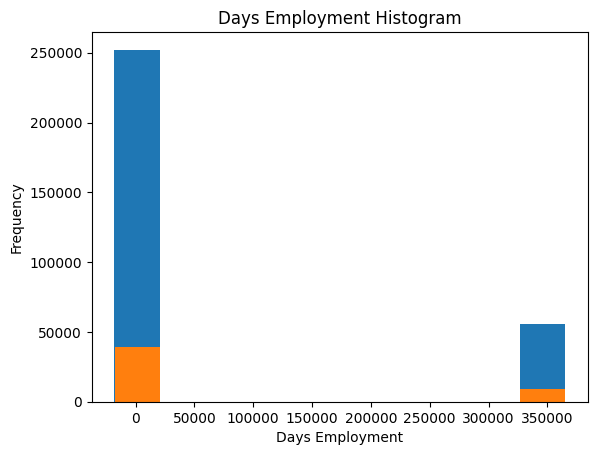

In [ ]:
# Membuat histogram dari kolom 'DAYS_EMPLOYED' untuk data train dan test
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
app_test['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('Days Employment')

# Memfilter dan menampilkan nilai 'DAYS_EMPLOYED' yang lebih besar dari 200000 pada data app_test
app_test['DAYS_EMPLOYED'][app_test['DAYS_EMPLOYED'] > 200000]

In [ ]:
# Mengurutkan nilai 'DAYS_EMPLOYED' secara menurun pada data app_train
app_train['DAYS_EMPLOYED'].sort_values(ascending=False)

146327    365243
229266    365243
157475    365243
229294    365243
157480    365243
           ...  
234168    -17522
35191     -17531
208899    -17546
273069    -17583
280994    -17912
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [ ]:
# Memisahkan nilai anomali dan non-anomali berdasarkan 'DAYS_EMPLOYED' yang bernilai 365243
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]

# Mencetak persentase non-anomali dan anomali yang mengalami default pada pinjaman
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
# Mencetak jumlah hari kerja yang termasuk dalam anomali
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


In [ ]:
# Menghitung statistik deskriptif untuk kolom 'DAYS_EMPLOYED' setelah menghapus anomali
(app_train['DAYS_EMPLOYED'] / -365).describe()

count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

There are 9274 anomalies in the test data out of 48744 entries



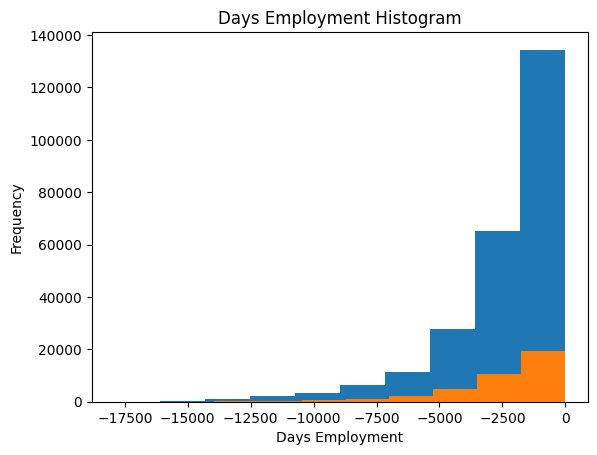

In [ ]:
# Membuat kolom flag anomali
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243

# Mengganti nilai anomali dengan NaN
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# Membuat histogram dari kolom days employment
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram')
app_test['DAYS_EMPLOYED'].plot.hist()
plt.xlabel('Days Employment')

# Cetak jumlah anomali dalam data uji
print('There are %d anomalies in the test data out of %d entries\n' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

mengubah app_train['DAYS_EMPLOYED'] dan app_test['DAYS_EMPLOYED'] dengan menghapus anomali yang ada dimana waktu bekerja lebih dari 1000 tahun

# Feature Engineering / Feature Selection

## Domain Knowledge

In [ ]:
# Membuat salinan dari dataset app_train dan app_test
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

# Menambahkan empat fitur baru ke dataset app_train_domain
app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']

In [ ]:
# Menambahkan fitur-fitur yang sama ke dataset app_test_domain
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']

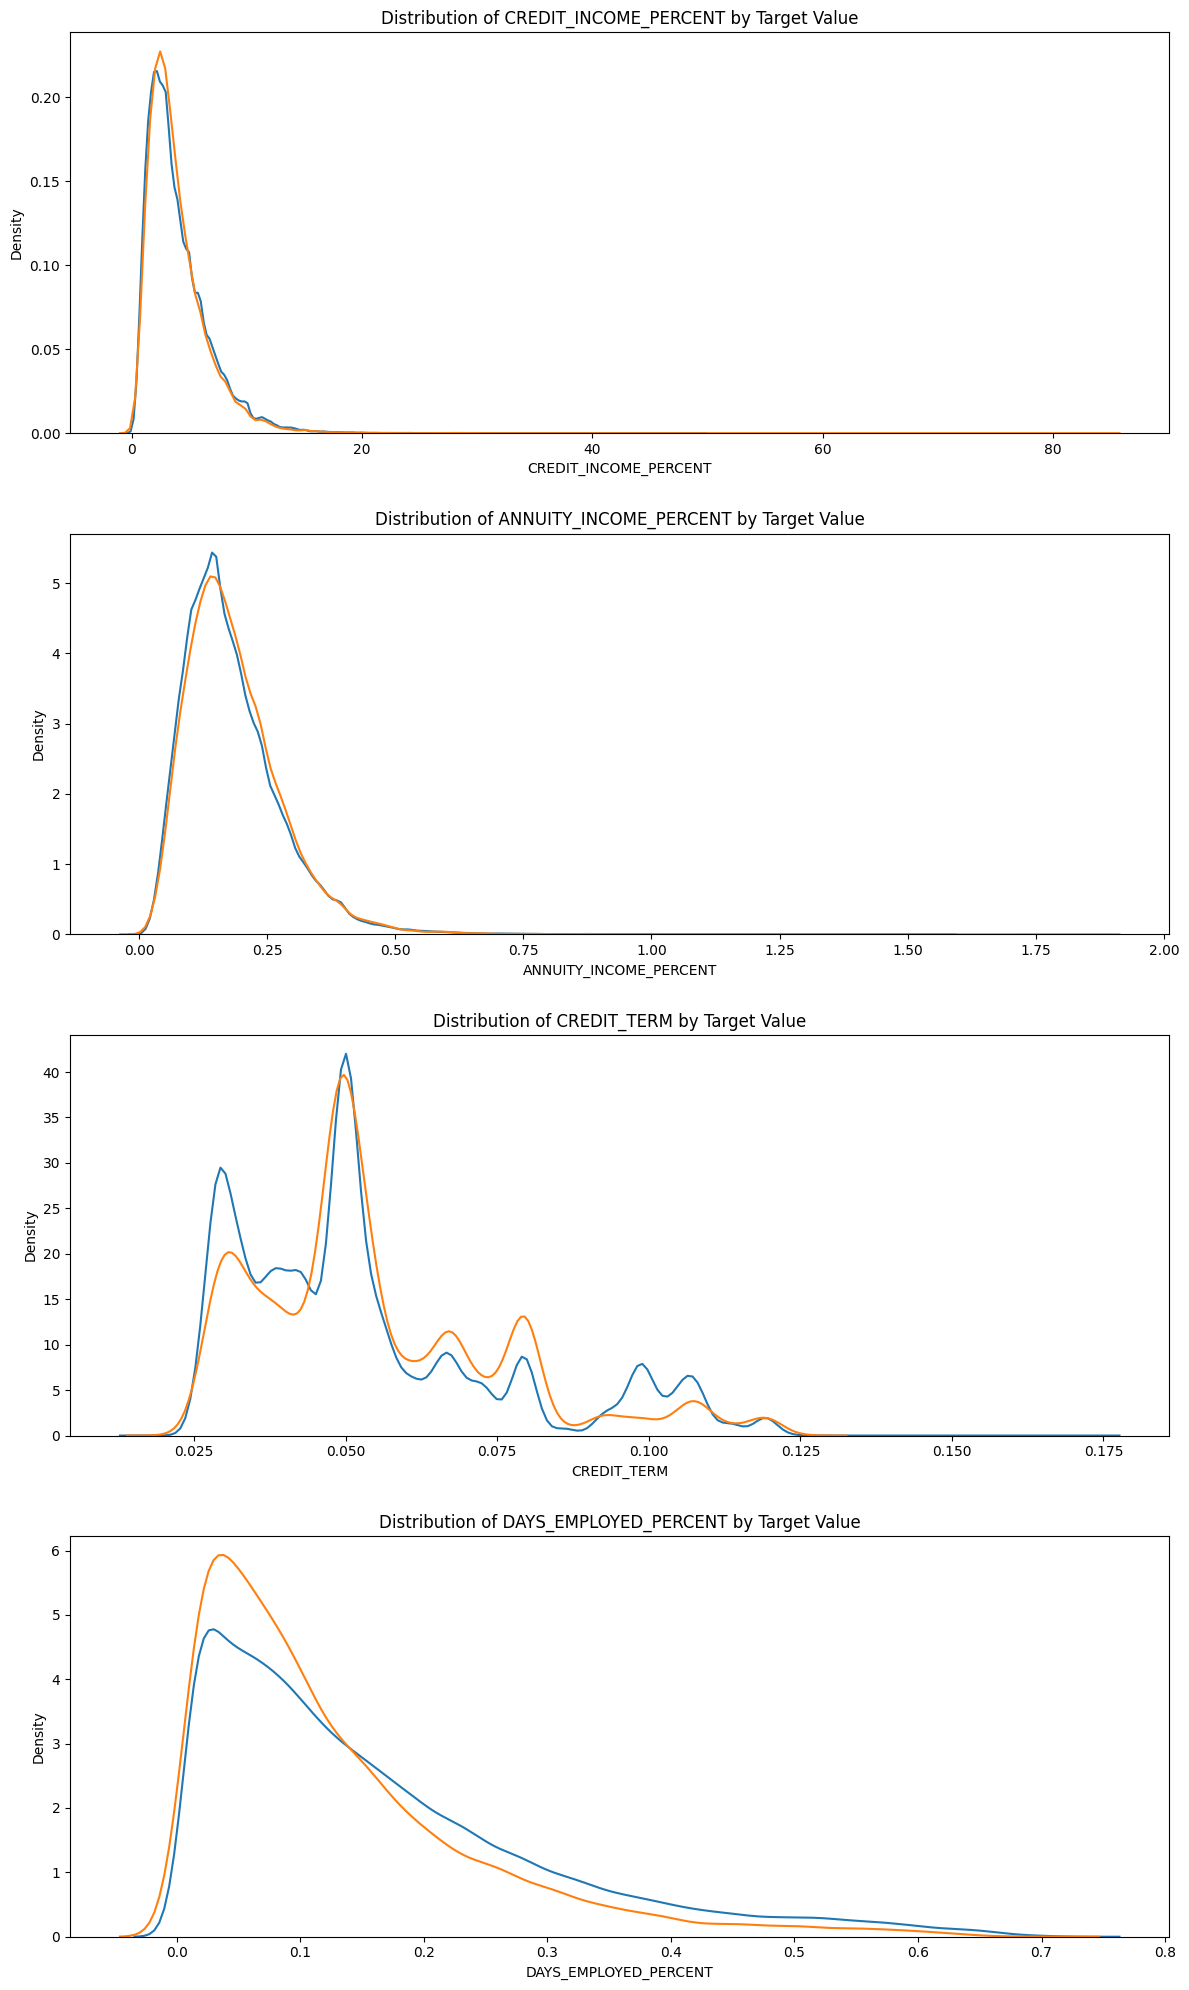

In [ ]:
plt.figure(figsize = (12, 20))
# Iterasi melalui fitur baru
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):

    # Buat subplot baru untuk setiap sumber
    plt.subplot(4, 1, i + 1)
    # Plot pinjaman dilunasi
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # Plot pinjaman yang tidak dilunasi
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')

    # Buat judul plot
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

# Final Data / Train Split

In [ ]:
# Mengisi nilai yang hilang (NaN) dalam DataFrame
def _fillna(df):
    df_final = df.copy()
    for feature in df_final.columns :
        if df_final[feature].dtypes!='O':
            df_final[feature]=df_final[feature].fillna(df_final[feature].median())
        elif df_final[feature].dtypes=='O':
            df_final[feature]=df_final[feature].fillna(df_final[feature].mode()[0])
    return df_final

In [ ]:
# Membuat DataFrame baru yang memiliki nilai yang hilang telah diisi dengan median atau mode sesuai tipe data kolomnya
app_train_temp=_fillna(app_train)

In [ ]:
from sklearn.utils import resample

# Buat dua kerangka data kelas mayoritas dan minoritas yang berbeda
df_majority = app_train_temp[(app_train_temp['TARGET']==1)] #aslinya 0
df_minority = app_train_temp[(app_train_temp['TARGET']==0)]  #aslinya 1
# Upsampling kelas minoritas
df_majority_upsampled = resample(df_majority,
                                 replace=True,    # Sample dengan penggantian
                                 n_samples= 282686, # Untuk mencocokkan kelas mayoritas
                                 random_state=42)  # Hasil setelah direproduksi
# Menggabungkan kelas mayoritas dengan kelas minoritas upsampled
df_upsampled = pd.concat([df_majority_upsampled, df_minority])

df_upsampled['TARGET'].value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

In [ ]:
# DataFrame yang merupakan hasil dari proses resampling untuk menangani ketidakseimbangan kelas pada kolom target
app_train = df_upsampled

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # Mengisi nilai yang hilang dalam fitur numerik
scaler = MinMaxScaler(feature_range = (0, 1)) # Melakukan penskalaan fitur

In [ ]:
# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
y = app_train['TARGET']
X = app_train.drop(labels='TARGET', axis=1)

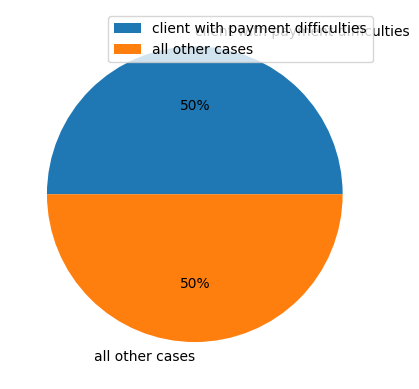

In [ ]:
# Membuat diagram pie dengan memasukkan label "client with payment difficulties" dan "all other cases"
values = y.value_counts()
labels = 'client with payment difficulties','all other cases'
plt.pie(values, labels=labels, autopct='%.0f%%')
plt.legend()
plt.show()

In [ ]:
test = app_test.copy()
features = list(X.columns)

imputer.fit(X)
# Imputasi median dari nilai yang hilang
X = imputer.transform(X)
test = imputer.transform(test)

scaler.fit(X)
# Melakukan penskalaan fitur
X = scaler.transform(X)
test = imputer.transform(test)

print('Training data shape:', X.shape)
print('Testing data shape:', test.shape)

Training data shape: (565372, 237)
Testing data shape: (48744, 237)


In [ ]:
# Memisahkan data latih dan data uji pada X dan y, dengan ukuran data uji sebesar 40% dari total data latih
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=1)

# MODELLING

## Logistic Regression

Implementasi algoritma logistic regression menggunakan library scikit-learn.

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr = lr.fit(X_train, y_train)
lr

LogisticRegression()

## Random Forest

Algoritma RandomForestClassifier dalam library scikit-learn untuk melakukan klasifikasi menggunakan metode Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf0 = RandomForestClassifier(random_state=42, n_jobs=-1) #hyperparameter lain dibiarkan default dahulu
classifier_rf = RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                                       n_jobs=-1, random_state=42) #setelah tuning


params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

# ========= HASIL TUNING
# RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
#                        n_jobs=-1, random_state=42)

Implementasi dari metode fit() pada objek classifier_rf0 yang merupakan instance dari kelas Random Forest Classifier

In [ ]:
classifier_rf0.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

Implementasi dari metode fit() pada objek classifier_rf yang juga merupakan instance dari kelas Random Forest Classifier

In [ ]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
# grid_search = GridSearchCV(estimator=classifier_rf,
#                            param_grid=params,
#                            cv = 4,
#                            n_jobs=-1, verbose=1, scoring="accuracy")

# grid_search.fit(X_train, y_train)

Kode di atas merupakan penggunaan GridSearchCV dari modul model_selection dalam library scikit-learn untuk mencari kombinasi hyperparameter yang optimal menggunakan validasi silang.

In [ ]:
# rf_best = grid_search.best_estimator_
# rf_best.fit(X_train, y_train)
# # y_rf = grid_search.best_estimator_
# # y_rf.fit(X_train, y_train)

Kode di atas merupakan kelanjutan dari penggunaan GridSearchCV untuk mencari kombinasi hyperparameter terbaik pada model RandomForestClassifier.

## LightGBM

Mempersiapkan data yang akan digunakan dalam pelatihan dan evaluasi model menggunakan LightGBM

In [ ]:
import lightgbm as lgb
x_lgbm_train, x_lgbm_val, y_lgbm_train, y_lgbm_val = train_test_split(X, y, test_size=0.4,random_state=1)
lgb_train = lgb.Dataset(data=x_lgbm_train, label=y_lgbm_train)
lgb_eval = lgb.Dataset(data=x_lgbm_val, label=y_lgbm_val)

In [ ]:
params = {'task': 'train', 'boosting_type': 'gbdt', 'objective': 'binary', 'metric': 'auc',
          'learning_rate': 0.01, 'num_leaves': 48, 'num_iteration': 25000, 'verbose': 0 ,

          'colsample_bytree':.8, 'subsample':.9, 'max_depth':7, 'reg_alpha':.1, 'reg_lambda':.1,
          'min_split_gain':.01, 'min_child_weight':1, 'verbosity': -1}
model = lgb.train(params, lgb_train, valid_sets=lgb_eval, early_stopping_rounds=150, verbose_eval=200)

[LightGBM] [Warning] verbosity is set=-1, verbose=0 will be ignored. Current value: verbosity=-1
Training until validation scores don't improve for 150 rounds
[200]	valid_0's auc: 0.756741
[400]	valid_0's auc: 0.772011
[600]	valid_0's auc: 0.782595
[800]	valid_0's auc: 0.790523
[1000]	valid_0's auc: 0.797037
[1200]	valid_0's auc: 0.803281
[1400]	valid_0's auc: 0.809274
[1600]	valid_0's auc: 0.814921
[1800]	valid_0's auc: 0.820174
[2000]	valid_0's auc: 0.824971
[2200]	valid_0's auc: 0.829421
[2400]	valid_0's auc: 0.83362
[2600]	valid_0's auc: 0.837888
[2800]	valid_0's auc: 0.841845
[3000]	valid_0's auc: 0.845525
[3200]	valid_0's auc: 0.849235
[3400]	valid_0's auc: 0.852868
[3600]	valid_0's auc: 0.856155
[3800]	valid_0's auc: 0.859368
[4000]	valid_0's auc: 0.862419
[4200]	valid_0's auc: 0.865633
[4400]	valid_0's auc: 0.868604
[4600]	valid_0's auc: 0.871413
[4800]	valid_0's auc: 0.873943
[5000]	valid_0's auc: 0.876462
[5200]	valid_0's auc: 0.878873
[5400]	valid_0's auc: 0.881159
[5600]	va

- Kode di atas menginisialisasi dan melatih model menggunakan algoritma Gradient Boosting yang disediakan oleh LightGBM dengan konfigurasi hyperparameter yang ditentukan.
- Setelah melatih model, objek model akan berisi model LightGBM yang telah dilatih dan siap untuk digunakan untuk melakukan prediksi pada data baru menggunakan metode predict().

In [ ]:
# prediksi logistic regression dan random forest
#y_lr = lr.predict(X_test)
y_rf0 = classifier_rf0.predict(X_test)
#y_rf = classifier_rf.predict(X_test)

- Kode di atas digunakan untuk melakukan prediksi menggunakan model Logistic Regression (lr), Random Forest tanpa tuning (classifier_rf0), dan Random Forest setelah tuning (classifier_rf) pada data uji (X_test).
- Setelah menjalankan kode di atas, variabel y_lr, y_rf0, dan y_rf akan berisi prediksi kelas yang dihasilkan oleh masing-masing model untuk data uji X_test.

# EVALUATION MODEL AND HYPER TUNNING

In [ ]:
# import library accuracy_score
from sklearn.metrics import accuracy_score

# hitung keakuratan dari model Logistic Regression, Random Forest tanpa Tuning, dan Random Forest dengan Tuning.
lr_accuracy = accuracy_score(y_test, y_lr)*100     # dalam persen
rf_accuracy0 = accuracy_score(y_test, y_rf0)*100
rf_accuracy = accuracy_score(y_test, y_rf)*100

In [ ]:
from sklearn.metrics import precision_score

# hitung presisi dari model Logistic Regression, Random Forest tanpa Tuning, dan Random Forest dengan Tuning.
lr_precision= precision_score(y_true=y_test, y_pred=y_lr, average='macro')*100
rf_precision0= precision_score(y_true=y_test, y_pred=y_rf0, average='macro')*100
rf_precision= precision_score(y_true=y_test, y_pred=y_rf, average='macro')*100

In [ ]:
from sklearn.metrics import recall_score

# hitung recall atau positive rate dari model Logistic Regression, Random Forest tanpa Tuning, dan Random Forest dengan Tuning.
lr_recall= recall_score(y_true=y_test, y_pred=y_lr, average='macro')*100
rf_recall0= recall_score(y_true=y_test, y_pred=y_rf0, average='macro')*100
rf_recall= recall_score(y_true=y_test, y_pred=y_rf, average='macro')*100

In [ ]:
df_score = pd.DataFrame({
    'Logistic Regression' :[lr_accuracy, lr_precision, lr_recall],
    'Random Forest Without Tuning' :[rf_accuracy0, rf_precision0, rf_recall0],
    'Random Forest' :[rf_accuracy, rf_precision, rf_recall],
    },
    index=['Accuracy','Precision','Recall'])

df_score

,Logistic Regression,Random Forest Without Tuning,Random Forest
Accuracy,68.262959,99.491928,90.119346
Precision,68.264017,99.495169,90.409151
Recall,68.263052,99.491827,90.118279


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_lr)
confusion_matrix(y_test, y_rf)

array([[ 97091,  15955],
       [  6390, 106713]])

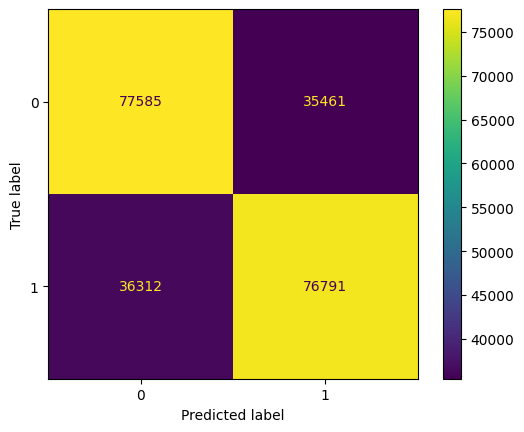

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_lr))

disp.plot()
plt.show()

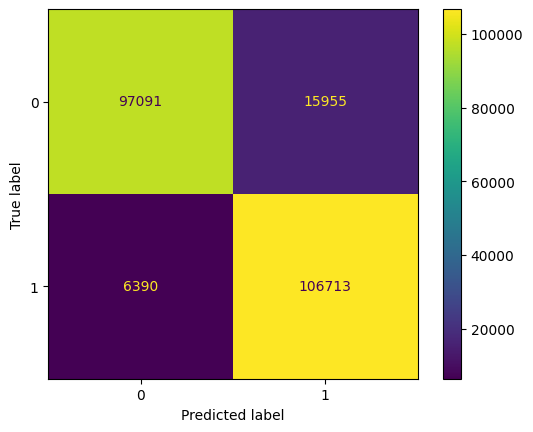

In [ ]:
disp1 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_rf))
disp1.plot()
plt.show()

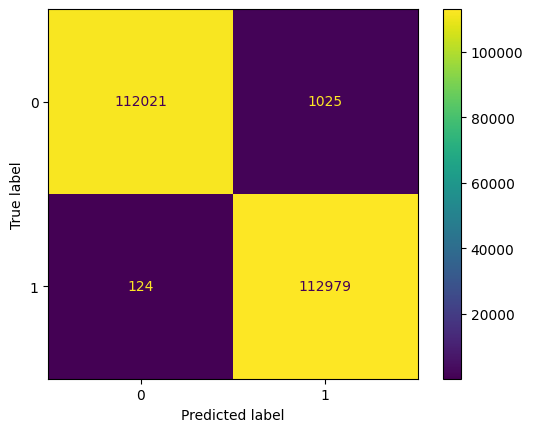

In [ ]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_rf0))
disp2.plot()
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
fpr0, tpr0, thresholds1 = roc_curve(y_test, y_rf0, pos_label=1) # pos_label: positive label
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
print(auc(fpr0, tpr0))
print(auc(fpr1, tpr1))

0.6826305220531583
0.9949182743826013
0.9011827943447049


In [ ]:
print(roc_auc_score(y_test, y_lr))
print(roc_auc_score(y_test, y_rf0))
print(roc_auc_score(y_test, y_rf))

0.6826305220531583
0.9949182743826013
0.9011827943447049


# Final Result / Model Selection

In [ ]:
print(f"Model logistic regression memiliki nilai AOC = {roc_auc_score(y_test, y_lr)}")
print(f"Model random forest memiliki nilai AOC tanpa tuning = {roc_auc_score(y_test, y_rf0)}")
print(f"Model random forest memiliki nilai AOC = {roc_auc_score(y_test, y_rf)}")
print(f"Model light gbm memiliki nilai AOC = 0.970872")

Model logistic regression memiliki nilai AOC = 0.6826305220531583
Model random forest memiliki nilai AOC tanpa tuning = 0.9949182743826013
Model random forest memiliki nilai AOC = 0.9011827943447049
Model light gbm memiliki nilai AOC = 0.970872


In [ ]:
roc_value = [roc_auc_score(y_test, y_lr),roc_auc_score(y_test, y_rf0),roc_auc_score(y_test, y_rf),0.970872]

In [ ]:
df_roc= pd.DataFrame({
    'Score' :roc_value
    },
    index=['Logistic Regression','Random Forest Without Tuning','Random Forest with Tuning', 'Light GBM'])

df_roc

,Score
Logistic Regression,0.682631
Random Forest Without Tuning,0.994918
Random Forest with Tuning,0.901183
Light GBM,0.970872


<Figure size 2000x1200 with 0 Axes>

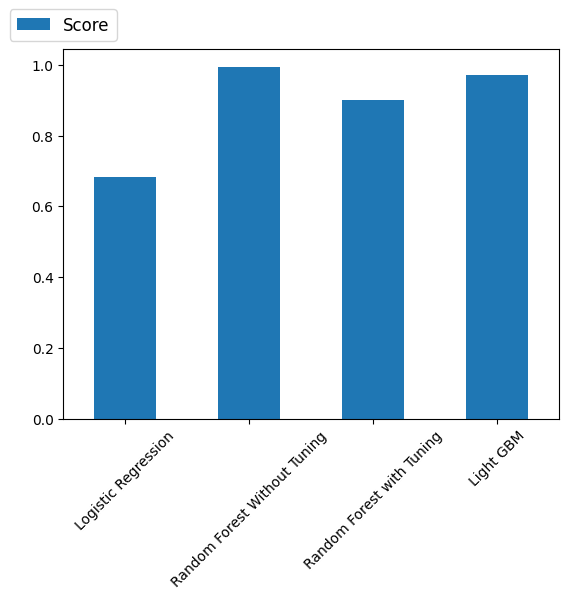

In [ ]:
fig = plt.figure(figsize=(20,12))
ax = df_roc.plot.bar(rot=45)
ax.legend(bbox_to_anchor=(0, 1), loc='lower center',prop={'size': 12})
plt.show()

In [ ]:
print(f"Model Random Forest tanpa tuning adalah model yang paling baik. Untuk meningkatan scorenya, tuning dapat diatur lagi")

Model Random Forest tanpa tuning memiliki nilai paling baik. Untuk meningkatan scorenya, tuning dapat diatur lagi


# UPLOAD KE LOOKER

In [ ]:
df_result = pd.DataFrame({'Predicted': y_rf0, 'Actual': y_test})
df_result = df_result.sort_index()
df_result


,Predicted,Actual
0,1,1
3,0,0
4,0,0
9,0,0
10,0,0
...,...,...
307509,1,1
307509,1,1
307509,1,1
307509,1,1


In [ ]:
# Membuat kolom baru 'Match' berdasarkan perbandingan antara 'Predicted' dan 'Actual'
df_result['Match'] = np.where(df_result['Predicted'] == df_result['Actual'], 'True', 'False')
df_result



,Predicted,Actual,Match
0,1,1,True
3,0,0,True
4,0,0,True
9,0,0,True
10,0,0,True
...,...,...,...
307509,1,1,True
307509,1,1,True
307509,1,1,True
307509,1,1,True


In [ ]:
from google.colab import files

# Simpan DataFrame ke dalam file CSV
df_result.to_csv('data looker model.csv', index=False)

# Download file CSV
files.download('data looker model.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>